<font size=5>
We have a set of data points and we would like to find the distances between them.
</font>

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, cdist, squareform

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# THE DATAPOINTS 
datapoints = np.array([[0, 1],   [1, 9],   [2, 0], 
                       [12, 3],  [2, 9],   [1, 1], 
                       [1, 0],   [2, 3],   [5, 10],
                       [4, 4],   [5, 8],   [2, 2],
                       [13, 9],  [8, 1],   [11, 1]])

In datapoints, the x-axis values are te first numbers listed and the y-axis values are the second numbers listed. 

__Plot Data Points__

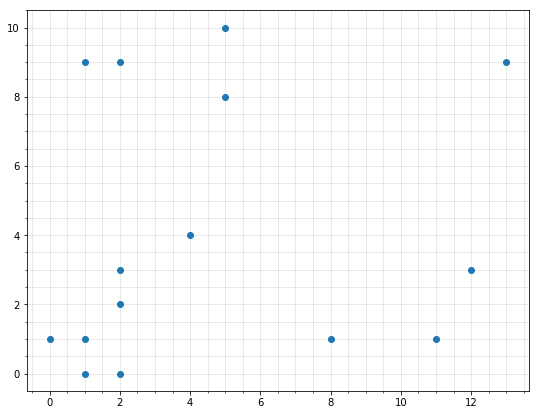

In [3]:
plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], 'o')

In [4]:
datapoints.shape

(15, 2)

<font size=4>
Since there are 15 sets of datapoints, we expect that there will be 15^2 = 225 distances to measure between each of these data points and the next. Yes, we include each datapoint's distance against itself, which would be 0. 

The function that computes these is `scipy.spatial.distance.cdist(XA, XB, metric='euclidean')`, where `XA` and `XB` are the arrays of data points to be compared, so `XA = XB = datapoints`. Since we use the same data set of points for both XA and XB, each comparison where the same data point is compared against itself, we get a distance of 0. Thus, if we put the final caluclation result into a matrix, the diagonal terms of the matrix will all be 0s. 



```
Signature: cdist(XA, XB, metric='euclidean', *args, **kwargs)
Docstring:
Compute distance between each pair of the two collections of inputs.
```
</font>

In [5]:
# scipy.spatial.distance.cdist
cdistances = cdist(datapoints, datapoints, metric='euclidean')
cdistances

array([[ 0.        ,  8.06225775,  2.23606798, 12.16552506,  8.24621125,
         1.        ,  1.41421356,  2.82842712, 10.29563014,  5.        ,
         8.60232527,  2.23606798, 15.26433752,  8.        , 11.        ],
       [ 8.06225775,  0.        ,  9.05538514, 12.52996409,  1.        ,
         8.        ,  9.        ,  6.08276253,  4.12310563,  5.83095189,
         4.12310563,  7.07106781, 12.        , 10.63014581, 12.80624847],
       [ 2.23606798,  9.05538514,  0.        , 10.44030651,  9.        ,
         1.41421356,  1.        ,  3.        , 10.44030651,  4.47213595,
         8.54400375,  2.        , 14.2126704 ,  6.08276253,  9.05538514],
       [12.16552506, 12.52996409, 10.44030651,  0.        , 11.66190379,
        11.18033989, 11.40175425, 10.        ,  9.89949494,  8.06225775,
         8.60232527, 10.04987562,  6.08276253,  4.47213595,  2.23606798],
       [ 8.24621125,  1.        ,  9.        , 11.66190379,  0.        ,
         8.06225775,  9.05538514,  6.        , 

In [6]:
# diagonal terms are all 0s because these are the ones where we compare each data point
#   against itself. 
np.diag(cdistances)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
cdistances.shape

(15, 15)


The distances stored in `cdistances[0]` are all the distances between `datapoint[0]`, which is `[0,1]` and every other data point. 


In [8]:
print(datapoints[0])
print(cdistances[0])

[0 1]
[ 0.          8.06225775  2.23606798 12.16552506  8.24621125  1.
  1.41421356  2.82842712 10.29563014  5.          8.60232527  2.23606798
 15.26433752  8.         11.        ]


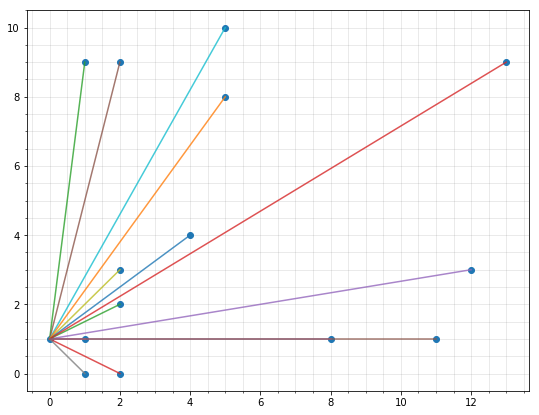

In [9]:
plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], marker='o', lw=0)
    
for i in range(0, len(datapoints)):
    plt.plot([datapoints[0][0], datapoints[i][0]], 
             [datapoints[0][1], datapoints[i][1]], 
             linestyle='-', alpha=0.8)

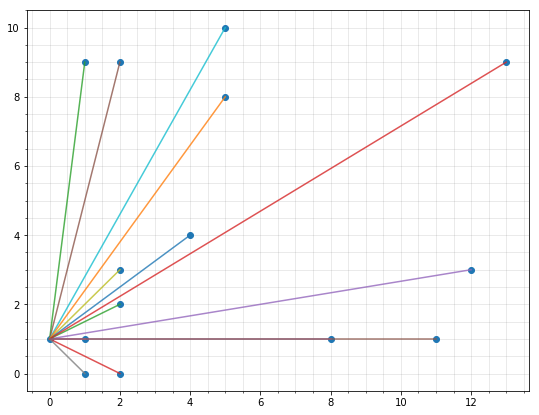

In [10]:
plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], marker='o', lw=0)
    
for i in range(0, len(datapoints)):
    plt.plot([datapoints[0][0], datapoints[i][0]], 
             [datapoints[0][1], datapoints[i][1]], 
             linestyle='-', alpha=0.8)



Each one of these lines between the first data point and any other data point represent the distances that have been measured and stored in `cdistances[0]`. We can show this same plot for the second data point `[1, 9]` and its distances stored in `cdistances[1]`.


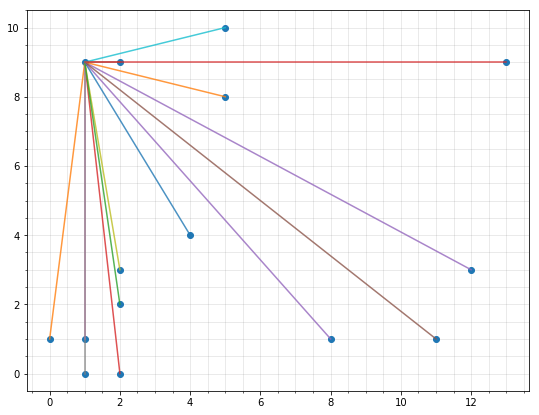

In [11]:
plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], marker='o', lw=0)

for i in range(0, len(datapoints)):
    plt.plot([datapoints[1][0], datapoints[i][0]], 
             [datapoints[1][1], datapoints[i][1]], '-', alpha=0.8)

In [12]:
# fancy coloring
from matplotlib import cm
colors = plt.cm.jet(np.linspace(0, 1, len(datapoints)))

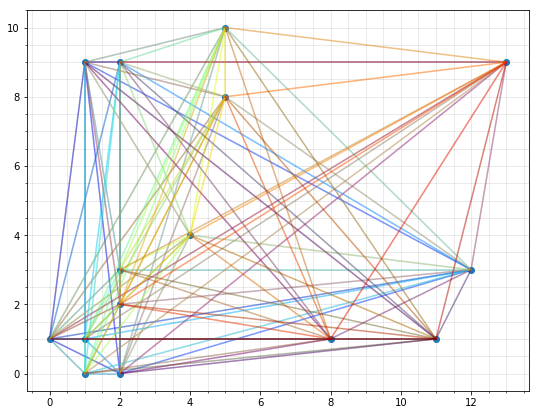

In [13]:
#  alpha = 0.3 -- make lines partially transparent

plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], 'o')

for i in range(0, len(datapoints)):
    for j in range(0, len(datapoints)):
        plt.plot([datapoints[i][0], datapoints[j][0]], 
                 [datapoints[i][1], datapoints[j][1]], ls='-', color=colors[i], alpha=0.3)

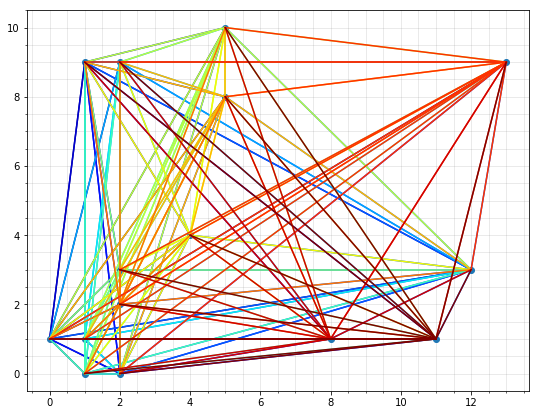

In [14]:
# alpha = 1 -- darkest lines

plt.figure(figsize=(9,7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()
plt.plot(datapoints.T[0], datapoints.T[1], 'o')

for i in range(0, len(datapoints)):
    for j in range(0, len(datapoints)):
        xdata = [datapoints[i][0], datapoints[j][0]]
        ydata = [datapoints[i][1], datapoints[j][1]]
        
        plt.plot(xdata, ydata, ls='-', color=colors[i], alpha=1)

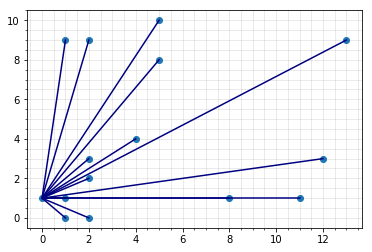

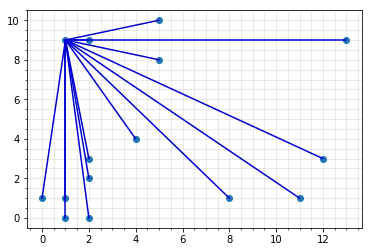

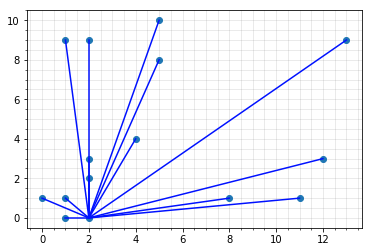

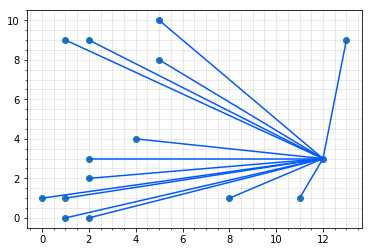

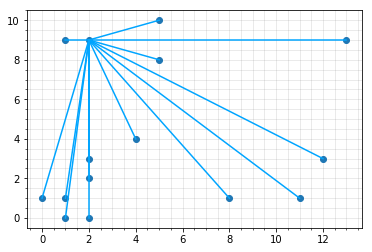

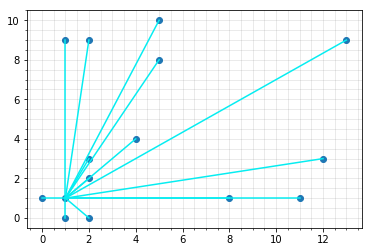

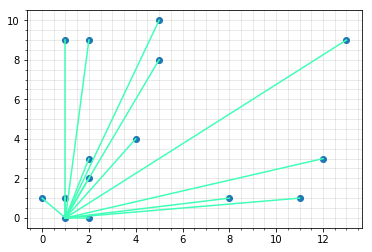

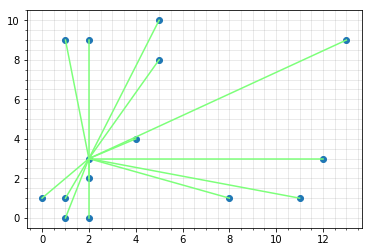

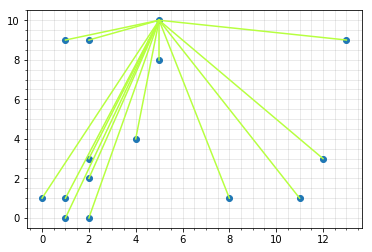

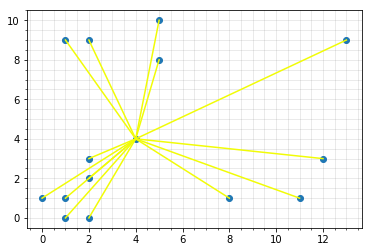

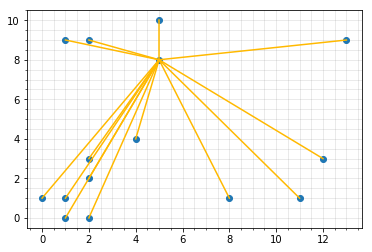

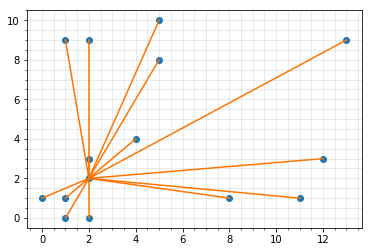

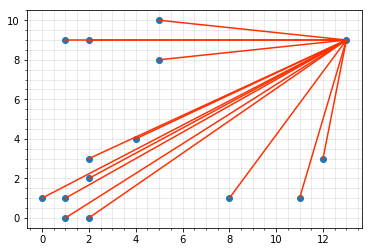

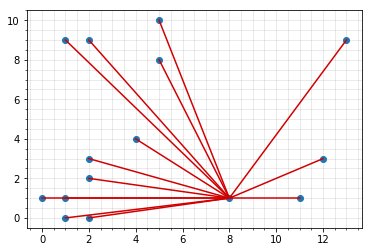

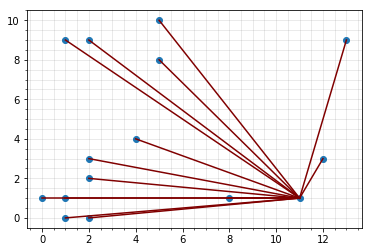

In [15]:
# Visiualize each data points' connections:
for i in range(0, len(datapoints)):
    plt.plot(datapoints.T[0], datapoints.T[1], 'o')
    plt.grid(which='both', axis='both', color='grey', alpha=0.2)
    plt.minorticks_on()
    for j in range(0, len(datapoints)):
        xdata = [datapoints[i][0], datapoints[j][0]]
        ydata = [datapoints[i][1], datapoints[j][1]]
        plt.plot(xdata, ydata, ls='-', color=colors[i], alpha=1)
    plt.show()

In [16]:
plt.clf()

<Figure size 432x288 with 0 Axes>

```


```

## How do we find these distances?


Lets start by finding the distance between the first data point in the `datapoints` dataset `[0,1]` and the second data point in the `datapoints` dataset, `[1,9]`. The format of these data points is `[x,y]`.

The distance we desire is the distance of a line drawn between these to data points. 


Text(0, 0.5, '$y$')

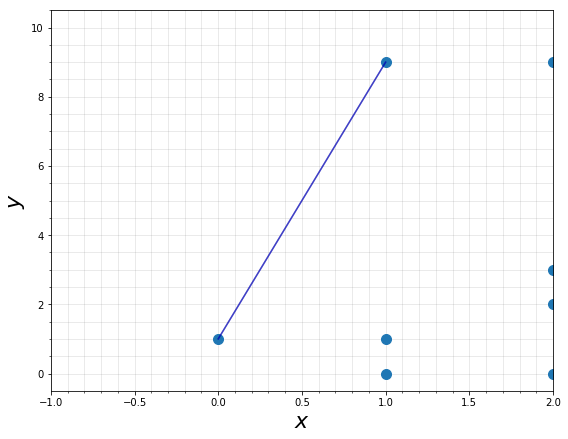

In [17]:
plt.figure(figsize=(9, 7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()

plt.plot(datapoints.T[0], datapoints.T[1], marker='o', markersize=10, lw=0)

for i in range(0, 2):
    for j in range(0, 2):
        xdata = [datapoints[i][0], datapoints[j][0]]
        ydata = [datapoints[i][1], datapoints[j][1]]
        plt.plot(xdata, ydata, '-', color=colors[i], alpha=0.5)


plt.xlim(-1, 2)
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$y$', fontsize=22)

If we take the difference between their x-values and their y-values, we find the lengths of their differences along the x- and y-axes. Now, lets draw those lines and label them $\Delta x$ and $\Delta y$.

Text(0, 0.5, '$y$')

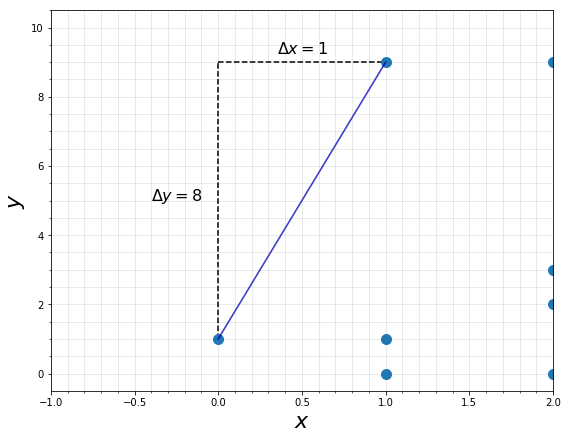

In [18]:
plt.figure(figsize=(9, 7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()

plt.plot(datapoints.T[0], datapoints.T[1], marker='o', markersize=10, lw=0)

for i in range(0, 2):
    for j in range(0, 2):
        xdata = [datapoints[i][0], datapoints[j][0]]
        ydata = [datapoints[i][1], datapoints[j][1]]
        plt.plot(xdata, ydata, '-', color=colors[i], alpha=0.5)


plt.hlines(y=9, xmin=0, xmax=1, color='k', linestyles='--', alpha=1)
plt.vlines(x=0, ymin=1, ymax=9, color='k',linestyles='--',  alpha=1)

plt.text(0.5, 9.25, '$\Delta x = 1$', 
         horizontalalignment='center', fontsize=16)


plt.text(-0.25, 5, '$\Delta y = 8$', 
         horizontalalignment='center', fontsize=16)


plt.xlim(-1, 2)
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$y$', fontsize=22)

```

```

<font size=4>
Not sure if it's clear yet where this is going, but if you haven't guessed it yet, this should help.
</font>

```

```

Text(0.5, 1.0, 'We are using the Pythagorean Theorem!!')

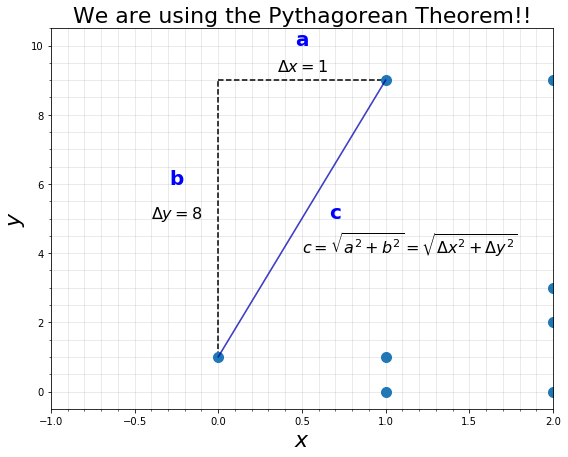

In [19]:
plt.figure(figsize=(9, 7))
plt.grid(which='both', axis='both', color='grey', alpha=0.2)
plt.minorticks_on()

plt.plot(datapoints.T[0], datapoints.T[1], marker='o', markersize=10, lw=0)

for i in range(0, 2):
    for j in range(0, 2):
        xdata = [datapoints[i][0], datapoints[j][0]]
        ydata = [datapoints[i][1], datapoints[j][1]]
        plt.plot(xdata, ydata, '-', color=colors[i], alpha=0.5)


plt.hlines(y=9, xmin=0, xmax=1, color='k', linestyles='--', alpha=1)
plt.vlines(x=0, ymin=1, ymax=9, color='k',linestyles='--',  alpha=1)

plt.text(0.5, 9.25, '$\Delta x = 1$', 
         horizontalalignment='center', fontsize=16)


plt.text(-0.25, 5, '$\Delta y = 8$', 
         horizontalalignment='center', fontsize=16)

plt.text(0.5, 4, '$c = \sqrt{a^2+b^2} = \sqrt{\Delta x^2 + \Delta y^2}$', 
         horizontalalignment='left', fontsize=16)


plt.text(0.5, 10, 'a', 
         horizontalalignment='center', fontsize=20, 
         fontweight='bold', color='blue')

plt.text(-0.25, 6, 'b', 
         horizontalalignment='center', fontsize=20, 
         fontweight='bold', color='blue')

plt.text(0.7, 5, 'c', 
         horizontalalignment='center', fontsize=20, 
         fontweight='bold', color='blue')


plt.xlim(-1, 2)
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$y$', fontsize=22)
plt.title('We are using the Pythagorean Theorem!!', fontsize=22)

In [20]:
delta_x, delta_y = 1, 8
c = np.sqrt(delta_x**2 + delta_y**2)
c

8.06225774829855

If we look at the `cdistances` for the first data point, `cdistances[0]`, then 8.06225774829855 should be in that array. It happens to be the second value in the array, and that is because the first value is 0, where the first data point was compared against itself.

In [21]:
cdistances[0]

array([ 0.        ,  8.06225775,  2.23606798, 12.16552506,  8.24621125,
        1.        ,  1.41421356,  2.82842712, 10.29563014,  5.        ,
        8.60232527,  2.23606798, 15.26433752,  8.        , 11.        ])

```


```

## Lets set-up a Pythagorean Theorem Function 
to perfrom all the distance caclulcations for every data point in the dataset against every other data point. 

In [22]:
def pythagorean_theorem(a, b):
    '''
    pythagorean_theorem(a, b)
    
    PARAMETERS:
    -----------
    a: float, distance along one side of triangle. (not hypotenuse)
    b: float, distance along one side of triangle. (not hypotenuse)
    
    RETURNS:
    ----------
    returns c, the hypotenuse of the triangle.
    Pythagorean Theorem is c^2 = a^2 + b^2, 
    so returns sqrt(a^2 + b^2)
    
    '''
    return np.sqrt(a**2 + b**2)

In [23]:
# MY CALCULATIONS USING PYTHAG. THEOREM


my_cdistances = []

for i,datapt_1 in enumerate(datapoints):
    ith_datapoints_hypotenuses = []
    for j,datapt_2 in enumerate(datapoints):
        
        #print(datapt_1, datapt_2)
        xdata = datapt_1[0], datapt_2[0]
        ydata = datapt_1[1], datapt_2[1]
        
        # calculate delta x and delta y between two data points. 
        xdiff = float(np.diff(xdata))
        ydiff = float(np.diff(ydata))
        
        # calcualte c, the hypotenuse of the triangle.
        hypotenuse = pythagorean_theorem(a=xdiff, b=ydiff)

        # store all distances between the ith data point and all other points together.
        ith_datapoints_hypotenuses.append( hypotenuse )
    
    # store all ith data point's hypotenuses into a list.    
    my_cdistances.append( ith_datapoints_hypotenuses )

# convert it to a numpy array. Shape should be (15, 15), the same shape of of cdistances.
my_cdistances = np.asarray(my_cdistances)

print(my_cdistances.shape)



(15, 15)


```

```
Now compare `my_cdistances` and `cdistances`
```

```

In [24]:
my_cdistances[0]

array([ 0.        ,  8.06225775,  2.23606798, 12.16552506,  8.24621125,
        1.        ,  1.41421356,  2.82842712, 10.29563014,  5.        ,
        8.60232527,  2.23606798, 15.26433752,  8.        , 11.        ])

In [25]:
cdistances[0]

array([ 0.        ,  8.06225775,  2.23606798, 12.16552506,  8.24621125,
        1.        ,  1.41421356,  2.82842712, 10.29563014,  5.        ,
        8.60232527,  2.23606798, 15.26433752,  8.        , 11.        ])

In [26]:
my_cdistances == cdistances

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

```

```

Confirmation that our distances match those found by the `scipy.spatial.distance.cdist` function. We showed how that function works, when the Euclidean space metric is used to compute distances. Here is the calculation we perfromed to get cdistances:

    from scipy.spatial.distance import cdist
    cdistances = cdist(datapoints, datapoints, metric='euclidean')

```


```

## What if we don't want repeat any distance calculations?
For example, if we have a list

    [A, B, C, D] 
    
and we want to compare each element agaisnt each other element, but not repeat any comparisons. It would look like this:

    A vs B
    A vs C
    A vs D
    
    B vs C
    B vs D
     
    C vs D
    
What `scipy.spatial.distance import cdist` does is this:

    A vs A
    A vs B
    A vs C
    A vs D
    
    B vs A
    B vs B
    B vs C
    B vs D
    
    C vs A
    C vs B
    C vs C
    C vs D
    
    D vs A
    D vs B
    D vs C
    D vs D

<br>

__To skip over the repeat comparisons (or distance calculations in our case), we can use `scipy.spatial.distance import pdist`.__

In [27]:
pdistances = pdist(datapoints, metric='euclidean')
pdistances

array([ 8.06225775,  2.23606798, 12.16552506,  8.24621125,  1.        ,
        1.41421356,  2.82842712, 10.29563014,  5.        ,  8.60232527,
        2.23606798, 15.26433752,  8.        , 11.        ,  9.05538514,
       12.52996409,  1.        ,  8.        ,  9.        ,  6.08276253,
        4.12310563,  5.83095189,  4.12310563,  7.07106781, 12.        ,
       10.63014581, 12.80624847, 10.44030651,  9.        ,  1.41421356,
        1.        ,  3.        , 10.44030651,  4.47213595,  8.54400375,
        2.        , 14.2126704 ,  6.08276253,  9.05538514, 11.66190379,
       11.18033989, 11.40175425, 10.        ,  9.89949494,  8.06225775,
        8.60232527, 10.04987562,  6.08276253,  4.47213595,  2.23606798,
        8.06225775,  9.05538514,  6.        ,  3.16227766,  5.38516481,
        3.16227766,  7.        , 11.        , 10.        , 12.04159458,
        1.        ,  2.23606798,  9.8488578 ,  4.24264069,  8.06225775,
        1.41421356, 14.4222051 ,  7.        , 10.        ,  3.16

In [28]:
len(pdistances)

105

Check to see if the number of distance calculations is correct:

In [29]:
from functools import reduce
reduce(lambda x,y: x+y, range(1, len(datapoints)))

105

YEP! We are good.

__Calculating my own pdistances.__

In [30]:

my_pdistances = []

for i,datapt_1 in enumerate(datapoints):
    for j,datapt_2 in enumerate(datapoints[i+1:]):
        
        #print(datapt_1, datapt_2)
        xdata = datapt_1[0], datapt_2[0]
        ydata = datapt_1[1], datapt_2[1]
        
        # calculate delta x and delta y between two data points. 
        xdiff = float(np.diff(xdata))
        ydiff = float(np.diff(ydata))
        
        # calcualte c, the hypotenuse of the triangle.
        hypotenuse = pythagorean_theorem(a=xdiff, b=ydiff)
    
        # store all data point's hypotenuses into a list.    
        my_pdistances.append( hypotenuse )

# convert it to a numpy array. 
my_pdistances = np.asarray(my_pdistances)

print(my_pdistances.shape)

(105,)


In [31]:
# nice, they match!
my_pdistances == pdistances

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])